IMPORT TWEEPY

In [2]:
import os
import tweepy as tw
import pandas as pd

Give Twitter Access keys  - Input Twitter Access keys

In [3]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [5]:
# Define the search term and the date_since date as variables
search_words = "FDA+covid+vaccine -filter:retweets"
date_since = "2020-12-05"
date_until = "2020-12-11"

In [6]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              tweet_mode='extended',
              geocode="42.3601,-71.0589,5mi",
              lang="en",
              since=date_since,
              until=date_until).items(5000)
tweets

In [7]:
users_locs = [[tweet.user.screen_name, tweet.user.location, tweet.full_text] for tweet in tweets]
dataset = pd.DataFrame(data=users_locs, 
                    columns=['user', "location", "TWEETS"])
dataset.head()


,user,location,TWEETS
0,HelenBranswell,"Boston, MA","Well, that was a day!\n#VRBPAC #Covid19 #Pfize..."
1,ZaqsPolitics,"Boston, MA",FDA advisory panel endorses widespread use of ...
2,FindWESdotcom,"Boston, MA",FDA panel recommends approval of Pfizer/BioNTe...
3,sweetadelinevt,"Boston, MA",Here we go----&gt;FDA panel recommends approva...
4,EricKaneTV,"Boston, MA","Breaking News: In a 17-4 vote, a FDA advisory ..."


In [8]:
len(dataset)

110

In [9]:
import re
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

In [12]:
import re
corpus = []
for i in range(len(dataset)):     #  for i in range(0, 1000):
  text = dataset['TWEETS'][i]
  #text = text.lower()
  text = re.sub('(@\w+)', '', text)  # Removing @ followed by words i.e. usernames
  text = re.sub('\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)   # Removing hyperlinks
  text = re.sub('\s+', ' ', text) # Removing multiple spaces with single space
  text = text.strip()
  dataset['TWEETS'][i] = text 
  #print('The current sample is: ', i)
print('COMPLETED')

COMPLETED


In [ ]:
corpus_list = dataset['TWEETS'].values.tolist()
corpus_list

In [ ]:
pip install -U sentence-transformers

In [15]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')

100%|██████████| 405M/405M [00:46<00:00, 8.65MB/s]


In [16]:
sentence_embeddings = model.encode(corpus_list, show_progress_bar=True)

In [17]:
print('Length of sentence embeddings is: ', len(sentence_embeddings))
print('Type of sentence embeddings is:', type(sentence_embeddings))

Length of sentence embeddings is:  110
Type of sentence embeddings is: <class 'numpy.ndarray'>


In [18]:
# Converting the generated 'sentence_embeddings' back to dataframe
df_embedding = pd.DataFrame(sentence_embeddings)

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import numpy as np
import pandas as pd
import pickle
import keras
from array import array
from numpy import *
import time

In [21]:
# load the model from disk
filename = '/content/drive/MyDrive/Covid19/NB_classifier.sav'
classifier = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, y_test)
#print(result)
print('embeddings loaded')

embeddings loaded


In [22]:
# Predicting the Test set results
y_pred = classifier.predict(df_embedding)
print('y_pred is: ', y_pred)

y_pred is:  [4 4 4 4 4 0 0 4 4 4 4 4 4 4 0 4 4 4 0 0 4 4 4 0 4 4 4 0 4 4 4 0 0 4 4 0 4
 0 4 0 0 0 4 4 0 4 4 4 4 4 4 0 0 4 4 4 4 4 4 0 4 0 4 0 4 4 0 0 0 0 4 0 4 4
 4 0 0 4 4 4 4 0 0 0 0 0 4 4 4 4 4 4 4 4 0 4 0 4 4 4 4 4 4 0 4 4 4 0 0 0]


In [23]:
len(y_pred)

110

In [26]:
df = pd.DataFrame({ 'label': y_pred})

df['CLASS'] = df['label'].map({0: 'negative', 4 : 'positive'})

pie_chart = df.groupby(['CLASS']).size()



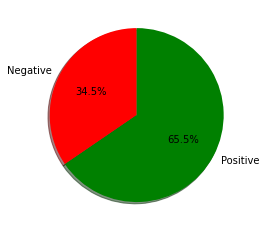

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.pie(pie_chart, labels=['Negative', 'Positive'], colors=['red', 'green'],
        autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()